In [1]:
!pip install tqdm

     |████████████████████████████████| 71kB 15.6MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [4]:
df = pd.read_csv('Consumer_Discretionary.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dfri=df[~df['ReferenceLevelNum'].isin([99])]
dfb = dfri[~dfri['Base Salary'].isna()]

In [8]:
dfbs = dfb[['NumOfEmpDesc','ReferenceLevelNum','IncumbentPointCount','Base Salary']]
dfbs = dfbs[~dfbs['NumOfEmpDesc'].isna()]

In [9]:
def base_plot(x,y1,y2,ylabel,title):
    plt.figure(figsize = (10,5))
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.xlabel('CalendarYear')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(['mean','median'],loc = 'best')
    plt.show()
    
def poly_model(model_degree,x,y,x_bottom,x_up,xlabel):
    Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)
    pf = PolynomialFeatures(degree=model_degree)
    x_2_fit = pf.fit_transform(Xtrain)
    lrModel = LinearRegression()
    lrModel.fit(x_2_fit,ytrain)
    test_x_poly = pf.fit_transform(Xtest)
    test_y_ = lrModel.predict(test_x_poly)
    print('Coefficients: \n', lrModel.coef_) 
    print('Intercept: \n', lrModel.intercept_) 
    print("R2-score: %.2f" % r2_score(test_y_ , ytest))
    XX = np.arange(x_bottom, x_up, 0.1)
    yy = lrModel.intercept_[0]+ lrModel.coef_[0][1]*XX+ lrModel.coef_[0][2]*np.power(XX, 2)
    plt.scatter(Xtest, ytest,  color='black')
    plt.plot(XX, yy, color='blue', linewidth=3)
    plt.xlabel(xlabel)
    plt.ylabel('Base Salary')
    plt.show()

def lin_model(x,y,xlabel):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print('Coefficients: \n', regr.coef_) 
    print('R2-score: %.2f' % r2_score(y_test, y_pred))
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.xlabel(xlabel)
    plt.ylabel('Base Salary')
    plt.show()

Linear regression analysis on relationship among multiple variables and base salary. The result R2-score is 0.94

In [12]:
factors = dfbs[['NumOfEmpDesc','ReferenceLevelNum','IncumbentPointCount']]
X_train, X_test, y_train, y_test = train_test_split(factors, dfbs[['Base Salary']], test_size=0.2)
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_) 
print('R2-score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ -153.27626985 -1807.36022169   183.90059817]]
R2-score: 0.72


Relationship between Base Salary and ReferenceLevelNumber

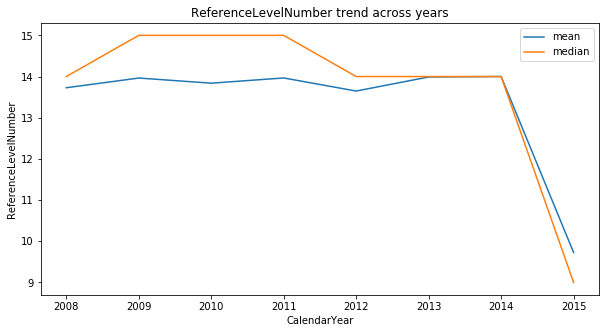

In [33]:
year = [2008,2009,2010,2011,2012,2013,2014,2015]
yrefmean = dfri.groupby('CalendarYear')['ReferenceLevelNum'].mean()
yrefmedian = dfri.groupby('CalendarYear')['ReferenceLevelNum'].median()
base_plot(year,yrefmean,yrefmedian,'ReferenceLevelNumber','ReferenceLevelNumber trend across years')

Linear and polynomial regression analysis on relationship between referencelevelnumber and base salary. 
R2 score and visualization demonstrate positive correlation between referencelevelnumber and base salary.
Based on above line plot about referencelevelnumber trend across years, high values in 2009-2011 and 
low value in 2015 seem to accord with trend of base salary across sectors.

Coefficients: 
 [[     0.         -10280.44251666    649.35572135]]
Intercept: 
 [62549.62802979]
R2-score: 0.54


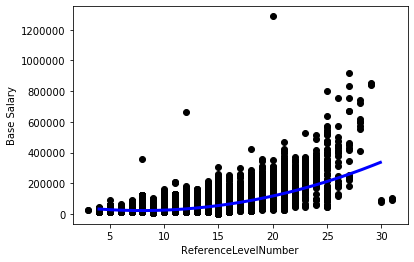

In [32]:
poly_model(2,dfb[['ReferenceLevelNum']],dfb[['Base Salary']],4,30,'ReferenceLevelNumber')

Coefficients: 
 [[5552.72631498]]
R2-score: 0.57


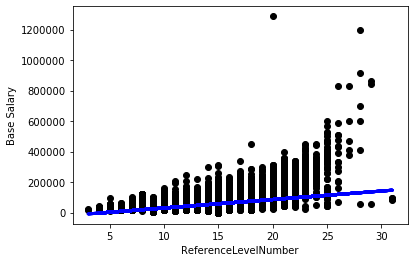

In [52]:
lin_model(dfb[['ReferenceLevelNum']],dfb[['Base Salary']],'ReferenceLevelNumber')

Relationship between Base Salary and IncumbentPointCount

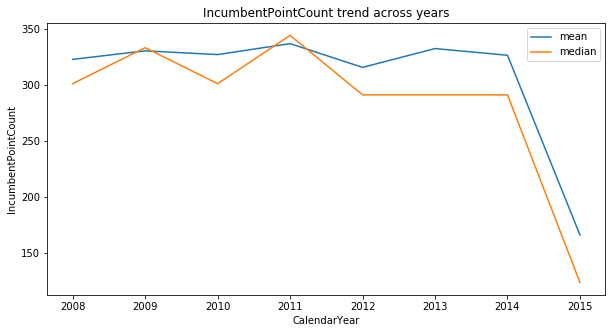

In [34]:
yincmean = dfri.groupby('CalendarYear')['IncumbentPointCount'].mean()
yincmedian = dfri.groupby('CalendarYear')['IncumbentPointCount'].median()
base_plot(year,yincmean,yincmedian,'IncumbentPointCount','IncumbentPointCount trend across years')

Linear regression fits kind of well on relationship between incumbentpointcount and base salary. 
R2 score and visualization demonstrate positive correlation between incumbentpointcount and base salary.
Based on above line plot about incumbentpointcount trend across years, high values in 2009-2011 and 
low value in 2015 seem to accord with trend of base salary across sectors.

Coefficients: 
 [[135.74417574]]
R2-score: 0.69


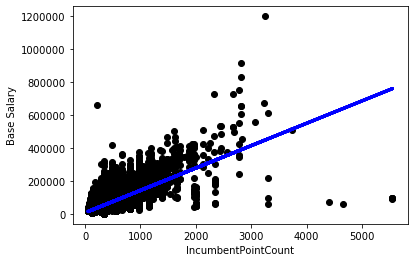

In [53]:
lin_model(dfb[['IncumbentPointCount']],dfb[['Base Salary']],'IncumbentPointCount')